In [1]:
# Abrindo conexão com o Google Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Importando Bibliotecas
import sqlite3
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Apresentas os dados no notebook.
%matplotlib inline 

# Definindo estilo para os gráficos.
sns.set_style("darkgrid")

# Tamanho da imagem.
plt.rcParams['figure.figsize'] = (12,8)

# Parametros do Pandas, limitando a quantidade máxima e a largura das colunas.
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [3]:
# Caminho do arquivo.
caminho = "/content/drive/MyDrive/pi_4/medidor.sqlite"

In [4]:
# Criando a conexão com o banco de dados
def conectaBanco(caminhoarquivo: caminho, query: str):
  try:
    conn = sqlite3.connect(caminhoarquivo)
    return(pd.read_sql_query(query, conn))
  except sqlite3.Error as error:
    print("Erro ao conectar com o banco de dados SQLite", error)

In [8]:
# Consulta a tabela medida.
query = """SELECT * FROM medida"""
dados = conectaBanco(caminho, query)

In [9]:
# Proporção dos dados.
dados.shape

(22, 5)

In [10]:
# Verificando informações dos dados.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data_hora   22 non-null     object 
 1   peso        22 non-null     float64
 2   sistolica   22 non-null     int64  
 3   diastolica  22 non-null     int64  
 4   pulsacao    22 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1008.0+ bytes


In [11]:
# Primeiros dados.
dados.head()

,data_hora,peso,sistolica,diastolica,pulsacao
0,2021-04-28 10:00:36,116.5,120,71,86
1,2021-04-28 22:16:24,116.7,120,72,79
2,2021-04-29 08:58:43,116.4,116,77,82
3,2021-04-29 22:53:17,116.5,122,73,81
4,2021-04-30 21:59:29,115.9,121,67,74


In [12]:
# Últimos dados.
dados.tail()

,data_hora,peso,sistolica,diastolica,pulsacao
17,2021-05-08 23:42:10,116.8,122,69,102
18,2021-05-10 11:30:32,117.3,125,72,87
19,2021-05-10 22:11:43,117.2,124,81,81
20,2021-05-11 10:15:02,117.1,114,68,90
21,2021-05-11 22:07:26,117.2,98,63,89


In [24]:
# Estatística Básica dos dados numéricos.
dados.describe()

,peso,sistolica,diastolica,pulsacao
count,22.000000,22.000000,22.000000,22.000000
mean,116.509091,118.181818,71.136364,86.136364
std,0.436337,7.506419,7.059579,10.384491
min,115.700000,98.000000,56.000000,69.000000
25%,116.300000,115.000000,68.250000,79.250000
50%,116.500000,120.500000,71.500000,84.000000
75%,116.700000,123.000000,77.000000,90.750000
max,117.300000,128.000000,81.000000,108.000000


In [40]:
# Transformando dados em formato datetime.
dados['data_hora'] = pd.to_datetime(dados['data_hora'], format='%Y-%m-%d %H:%M:%S')
dados['data_hora'].head()

0   2021-04-28 10:00:36
1   2021-04-28 22:16:24
2   2021-04-29 08:58:43
3   2021-04-29 22:53:17
4   2021-04-30 21:59:29
Name: data_hora, dtype: datetime64[ns]

In [70]:
# Formatando a data e hora.
dados['data'] = dados['data_hora'].apply(lambda x: x.strftime('%Y-%m-%d')) 
dados['hora'] = dados['data_hora'].apply(lambda x: x.strftime('%H:%M'))

# Obtendo dia da semana e periodo da hora se é AM ou PM.
dados['dia_semana'] = dados['data_hora'].apply(lambda x: x.strftime('%A')) 
dados['periodo_hora'] = dados['data_hora'].apply(lambda x: x.strftime('%p'))

# Verificando informações dos dados após transformação.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_hora     22 non-null     datetime64[ns]
 1   peso          22 non-null     float64       
 2   sistolica     22 non-null     int64         
 3   diastolica    22 non-null     int64         
 4   pulsacao      22 non-null     int64         
 5   data          22 non-null     object        
 6   hora          22 non-null     object        
 7   dia_semana    22 non-null     object        
 8   periodo_hora  22 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.7+ KB


In [71]:
# Verificando a proporção dos dados.
dados.shape

(22, 9)

In [72]:
# Primeiros dados.
dados.head()

,data_hora,peso,sistolica,diastolica,pulsacao,data,hora,dia_semana,periodo_hora
0,2021-04-28 10:00:36,116.5,120,71,86,2021-04-28,10:00,Wednesday,AM
1,2021-04-28 22:16:24,116.7,120,72,79,2021-04-28,22:16,Wednesday,PM
2,2021-04-29 08:58:43,116.4,116,77,82,2021-04-29,08:58,Thursday,AM
3,2021-04-29 22:53:17,116.5,122,73,81,2021-04-29,22:53,Thursday,PM
4,2021-04-30 21:59:29,115.9,121,67,74,2021-04-30,21:59,Friday,PM


In [73]:
# Últimos dados.
dados.tail()

,data_hora,peso,sistolica,diastolica,pulsacao,data,hora,dia_semana,periodo_hora
17,2021-05-08 23:42:10,116.8,122,69,102,2021-05-08,23:42,Saturday,PM
18,2021-05-10 11:30:32,117.3,125,72,87,2021-05-10,11:30,Monday,AM
19,2021-05-10 22:11:43,117.2,124,81,81,2021-05-10,22:11,Monday,PM
20,2021-05-11 10:15:02,117.1,114,68,90,2021-05-11,10:15,Tuesday,AM
21,2021-05-11 22:07:26,117.2,98,63,89,2021-05-11,22:07,Tuesday,PM


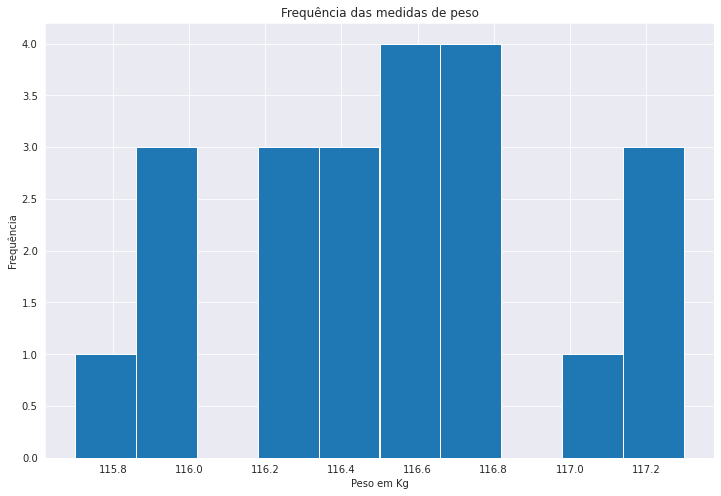

In [26]:
# Plotando gráfico das medidas do peso.
dados['peso'].hist()
plt.title('Frequência das medidas de peso')
plt.xlabel('Peso em Kg')
plt.ylabel('Frequência')
plt.show()

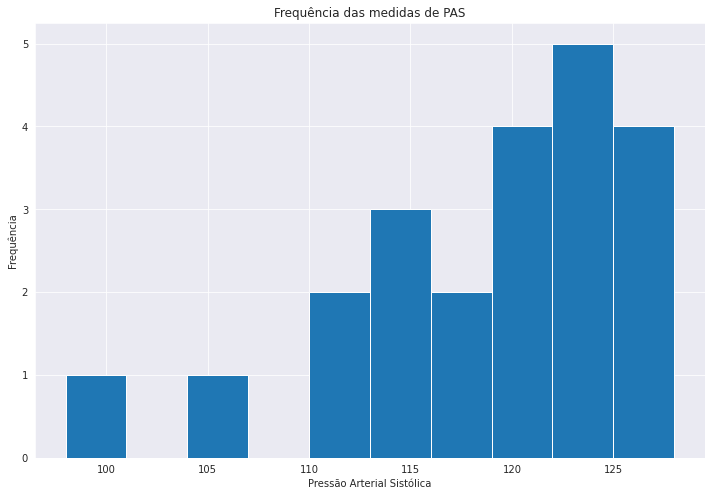

In [28]:
# Plotando gráfico das medidas do sistólica.
dados['sistolica'].hist()
plt.title('Frequência das medidas de PAS')
plt.xlabel('Pressão Arterial Sistólica')
plt.ylabel('Frequência')
plt.show()

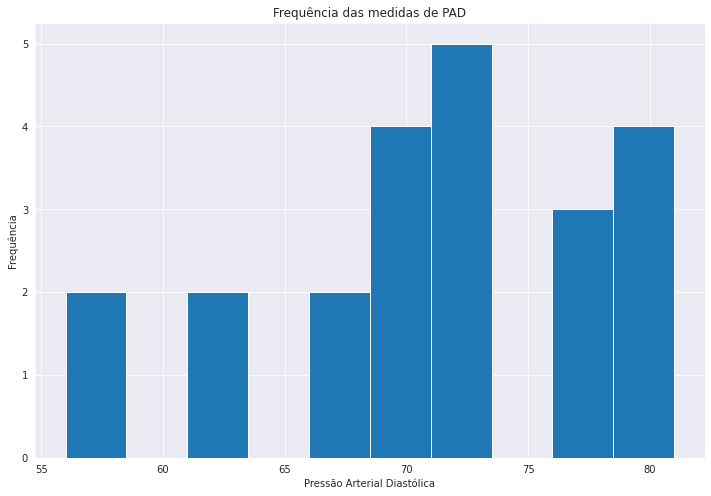

In [29]:
# Plotando gráfico das medidas do diastólica.
dados['diastolica'].hist()
plt.title('Frequência das medidas de PAD')
plt.xlabel('Pressão Arterial Diastólica')
plt.ylabel('Frequência')
plt.show()

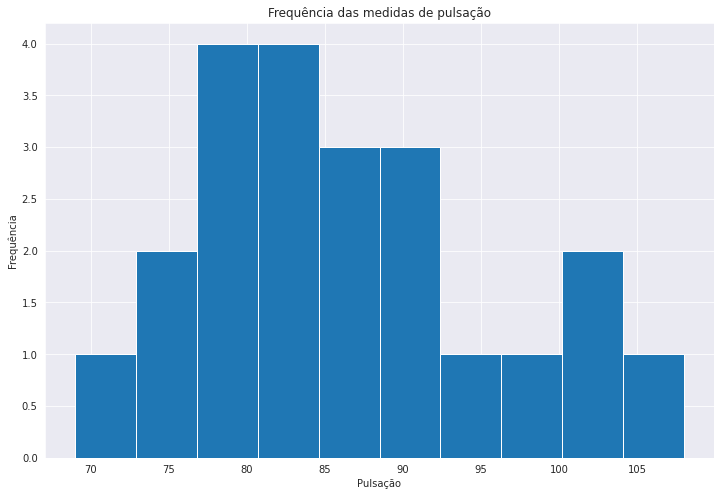

In [30]:
# Plotando gráfico das medidas da pulsação.
dados['pulsacao'].hist()
plt.title('Frequência das medidas de pulsação')
plt.xlabel('Pulsação')
plt.ylabel('Frequência')
plt.show()

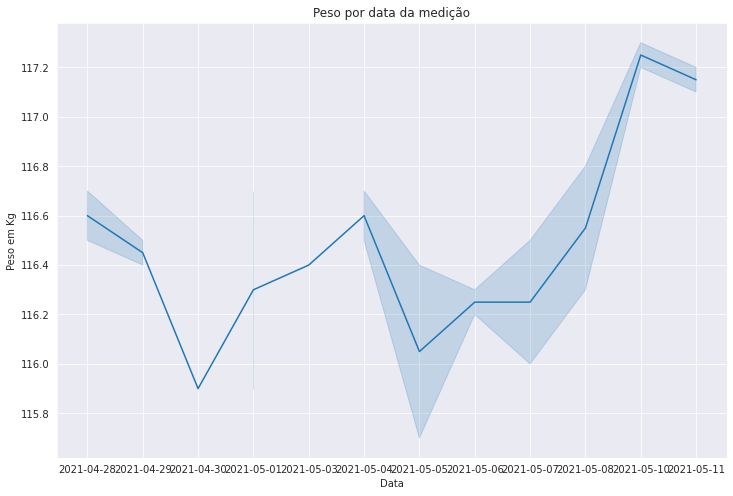

In [74]:
# Gráfico de comparação entre a peso e a data da medição.
sns.lineplot(data=dados, x='data', y='peso', style_order='whitegrid')
plt.title('Peso por data da medição')
plt.ylabel('Peso em Kg')
plt.xlabel('Data')
plt.show()

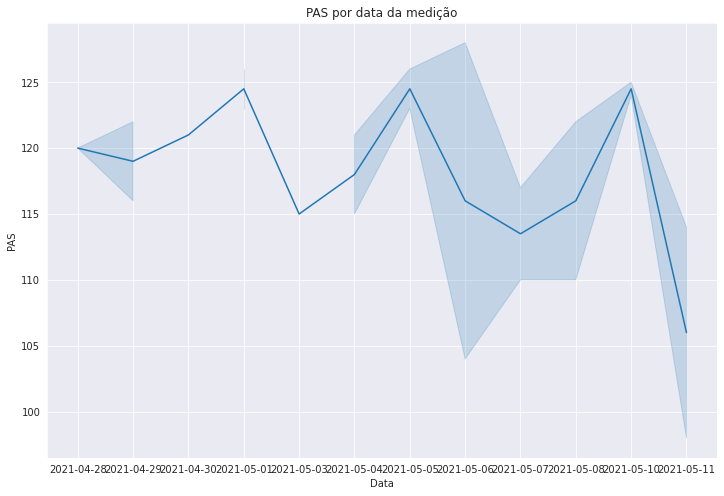

In [81]:
# Gráfico de comparação entre a PAS e a data da medição.
sns.lineplot(data=dados, x='data', y='sistolica', style_order='whitegrid')
plt.title('PAS por data da medição')
plt.ylabel('PAS')
plt.xlabel('Data')
plt.show()

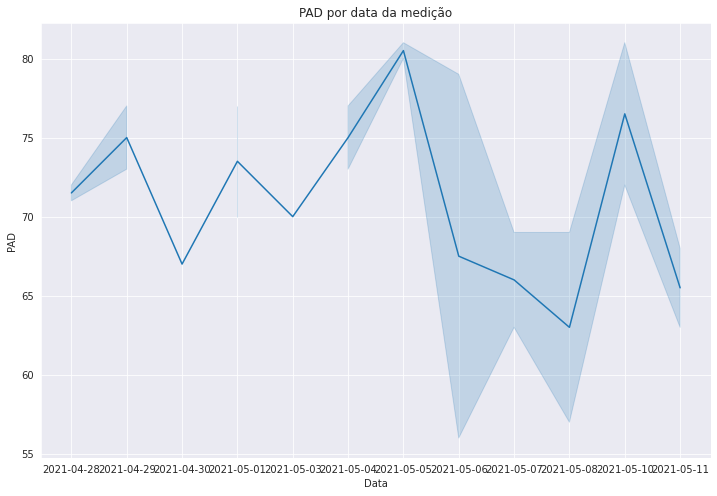

In [82]:
# Gráfico de comparação entre a PAD e a data da medição.
sns.lineplot(data=dados, x='data', y='diastolica', style_order='whitegrid')
plt.title('PAD por data da medição')
plt.ylabel('PAD')
plt.xlabel('Data')
plt.show()

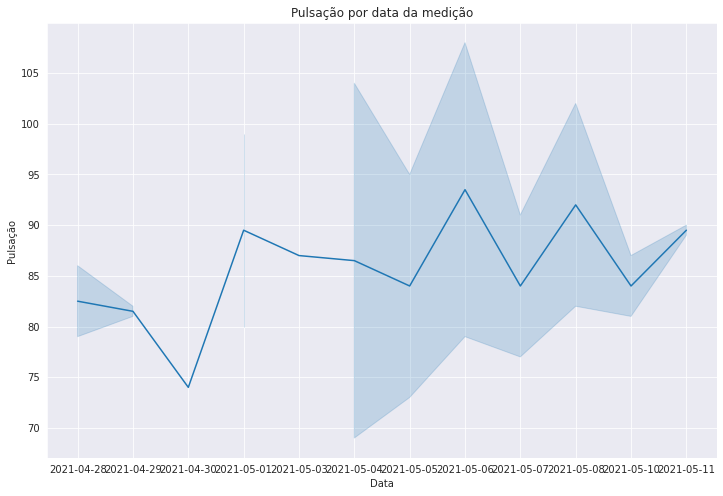

In [92]:
# Gráfico de comparação entre a pulsação e a data da medição.
sns.lineplot(data=dados, x='data', y='pulsacao', style_order='whitegrid')
plt.title('Pulsação por data da medição')
plt.ylabel('Pulsação')
plt.xlabel('Data')
plt.show()

In [91]:
# Agrupando por periodo_hora e dia_semana.
dados.groupby(by=['periodo_hora', 'dia_semana']).mean()

peso  sistolica  diastolica  pulsacao
periodo_hora dia_semana                                         
AM           Friday      116.00      110.0        63.0      77.0
             Monday      116.85      120.0        71.0      87.0
             Saturday    116.10      118.0        67.0      90.5
             Thursday    116.30      122.0        78.0      80.5
             Tuesday     116.80      114.5        72.5      97.0
             Wednesday   116.10      121.5        76.0      79.5
PM           Friday      116.20      119.0        68.0      82.5
             Monday      117.20      124.0        81.0      81.0
             Saturday    116.75      122.5        69.5      91.0
             Thursday    116.40      113.0        64.5      94.5
             Tuesday     116.95      109.5        68.0      79.0
             Wednesday   116.55      123.0        76.0      87.0